1e-07
0
100
200
300
400
500
600
700
800
900
0.10000009000000001
0
100
200
300
400
500
600
700
800
900
0.20000008000000002
0
100
200
300
400
500
600
700
800
900
0.30000007
0
100
200
300
400
500
600
700
800
900
0.40000006000000005
0
100
200
300
400
500
600
700
800
900
0.50000005
0
100
200
300
400
500
600
700
800
900
0.60000004
0
100
200
300
400
500
600
700
800
900
0.70000003
0
100
200
300
400
500
600
700
800
900
0.80000002
0
100
200
300
400
500
600
700
800
900
0.9000000100000001
0
100
200
300
400
500
600
700
800
900
1.0
0
100
200
300
400
500
600
700
800
900


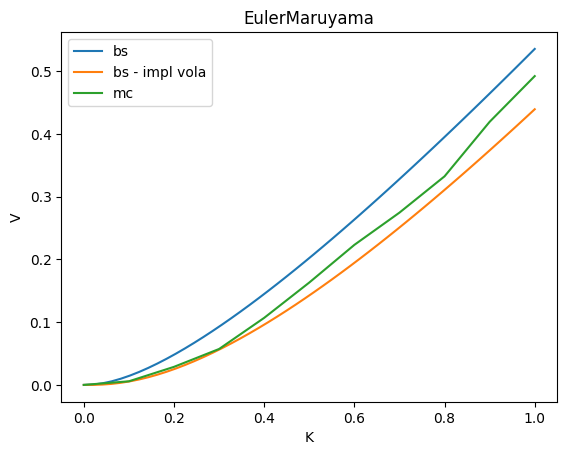

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bs import V, V_const

T = 2
# N: 100000
N = 1000
# m: 200
m = 200
S0 = 1
r = 0.045
dt = T/m

def sigma(t):
    return 0.2+np.exp(-0.3*t)

def dSt(St, sigma, dWt):
    return St+r*St*dt+sigma*St*dWt

def EulerMaruyama(St, sigma, dWt):
    #return St*(1+r*dt+sigma*dWt)
    return St*np.exp((r-0.5*(sigma**2))*dt + sigma*dWt)

def Milstein(St, sigma, dWt):
    return St*(1 + r*dt + sigma*dWt + 0.5*(sigma**2)*((dWt**2)-dt))

def simulatePath(f):
    S = S0
    for i in range(0,m):
        S = f(S, sigma(i*dt), np.sqrt(dt)*np.random.normal(0,1))
    return S

def run(K, f, v=False):
    data = np.zeros(N)
    for i in range(0,N):
        if v and i%(N/10) == 0: print(i)
        S = simulatePath(f)
        data[i] = max(K-S, 0)
    return np.mean(data)

if __name__ == "__main__":
    kmin = 1e-7
    kmax = 1
    Klist = np.linspace(kmin, kmax,11)
    data = []
    bsdata = []
    bs_cnstdata = []
    f = EulerMaruyama
    for K in Klist:
        print(K)
        data.append(run(K, f, True))
    
    dKlist = np.linspace(kmin, kmax,50)
    for K in dKlist:
        bsdata.append(V(S0, 0, K))
        bs_cnstdata.append(V_const(S0, 0, K))


    plt.plot(dKlist,bsdata, label="bs")
    plt.plot(dKlist,bs_cnstdata, label="bs - impl vola")
    plt.plot(Klist, data, label="mc")
    plt.title(f.__name__)
    plt.legend()
    plt.xlabel("K")
    plt.ylabel("V")
    plt.show()
    
        